In [2]:
import numpy as np
import numba
import scipy.sparse as ssp
import scipy.stats
import time
import sys
import pdb
%load_ext line_profiler

import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

## nu = 1/3

In [3]:
Nphi = lambda Ne, p, q: q*Ne/p

In [4]:
p = 1; q = 3
print("N_e | N_H       | N_H (sector) | N_H (Haldane) | N_H (Yoshioka)")
for Ne in np.arange(3, 16):
    NH1 = scipy.special.comb(Nphi(Ne, p, q), Ne)
    print("{0:2d}  | {1:.3e} | {2:.3e}    | {3:.4e}    | {4:.4e}".format(
#             Ne, NH1, NH1/(3*Ne), NH1/(3*Ne*Ne)))
           Ne, NH1, NH1/(Nphi(Ne, p, q)), NH1/(q*Ne*Ne), NH1/(Nphi(Ne, p, q)/q)**2))

N_e | N_H       | N_H (sector) | N_H (Haldane) | N_H (Yoshioka)
 3  | 8.400e+01 | 9.333e+00    | 3.1111e+00    | 9.3333e+00
 4  | 4.950e+02 | 4.125e+01    | 1.0312e+01    | 3.0938e+01
 5  | 3.003e+03 | 2.002e+02    | 4.0040e+01    | 1.2012e+02
 6  | 1.856e+04 | 1.031e+03    | 1.7189e+02    | 5.1567e+02
 7  | 1.163e+05 | 5.537e+03    | 7.9102e+02    | 2.3731e+03
 8  | 7.355e+05 | 3.064e+04    | 3.8306e+03    | 1.1492e+04
 9  | 4.687e+06 | 1.736e+05    | 1.9287e+04    | 5.7862e+04
10  | 3.005e+07 | 1.002e+06    | 1.0015e+05    | 3.0045e+05
11  | 1.935e+08 | 5.865e+06    | 5.3316e+05    | 1.5995e+06
12  | 1.252e+09 | 3.477e+07    | 2.8974e+06    | 8.6922e+06
13  | 8.122e+09 | 2.083e+08    | 1.6021e+07    | 4.8062e+07
14  | 5.286e+10 | 1.259e+09    | 8.9898e+07    | 2.6970e+08
15  | 3.449e+11 | 7.664e+09    | 5.1091e+08    | 1.5327e+09


## nu = 1/5

In [4]:
print("N_e | N_H       | N_H (sector) | N_H (Haldane)")
for N in np.arange(3, 12):
    NH1 = scipy.special.comb(5*N, N)
    print("{0:2d}  | {1:.3e} | {2:.3e}    | {3:.4e}".format(N, NH1, NH1/(3*N), NH1/(3*N*N)))

N_e | N_H       | N_H (sector) | N_H (Haldane)
 3  | 4.550e+02 | 5.056e+01    | 1.6852e+01
 4  | 4.845e+03 | 4.038e+02    | 1.0094e+02
 5  | 5.313e+04 | 3.542e+03    | 7.0840e+02
 6  | 5.938e+05 | 3.299e+04    | 5.4979e+03
 7  | 6.725e+06 | 3.202e+05    | 4.5745e+04
 8  | 7.690e+07 | 3.204e+06    | 4.0055e+05
 9  | 8.862e+08 | 3.282e+07    | 3.6468e+06
10  | 1.027e+10 | 3.424e+08    | 3.4241e+07
11  | 1.197e+11 | 3.626e+09    | 3.2962e+08


In [5]:
print("N_e | N_H       | N_H (sector) | N_H (Haldane)")
for N in np.arange(4, 18, 2):
    NH1 = scipy.special.comb(5*N//2, N)
    print("{0:2d}  | {1:.3e} | {2:.3e}    | {3:.4e}".format(N, NH1, NH1/(3*N), NH1/(3*N*N)))

N_e | N_H       | N_H (sector) | N_H (Haldane)
 4  | 2.100e+02 | 1.750e+01    | 4.3750e+00
 6  | 5.005e+03 | 2.781e+02    | 4.6343e+01
 8  | 1.260e+05 | 5.249e+03    | 6.5609e+02
10  | 3.269e+06 | 1.090e+05    | 1.0896e+04
12  | 8.649e+07 | 2.403e+06    | 2.0022e+05
14  | 2.320e+09 | 5.524e+07    | 3.9455e+06
16  | 6.285e+10 | 1.309e+09    | 8.1839e+07


In [6]:
import mbhamiltonian

In [7]:
params = {"Nphi": 9,
          "Ne": 3,
          "usemc": True}

In [8]:
T1 = mbhamiltonian.Torus(params["Nphi"])
MBH1 = mbhamiltonian.MBHamiltonian(T1, params)

In [9]:
P1 = mbhamiltonian.Potential(T1, {'type2': ['coulomb']})
# MBH1.

No 1-body terms


In [10]:
MBH1.make_hamiltonian2(P1)

Where's Waldo?


In [11]:
# Ham = MBH1.H2.todense()

In [12]:
E, V = ssp.linalg.eigsh(MBH1.H2, which='SA')

In [13]:
E[0] - E[3]

0.06652137253922613

In [14]:
MBH1.vechspace()

array([  7,  11,  13,  14,  19,  21,  22,  25,  26,  28,  35,  37,  38,
        41,  42,  44,  49,  50,  52,  56,  67,  69,  70,  73,  74,  76,
        81,  82,  84,  88,  97,  98, 100, 104, 112, 131, 133, 134, 137,
       138, 140, 145, 146, 148, 152, 161, 162, 164, 168, 176, 193, 194,
       196, 200, 208, 224, 259, 261, 262, 265, 266, 268, 273, 274, 276,
       280, 289, 290, 292, 296, 304, 321, 322, 324, 328, 336, 352, 385,
       386, 388, 392, 400, 416, 448])

In [15]:
orbocc = np.array([MBH1.dec2spin(n) for n in MBH1.vechspace()])

In [16]:
conf = np.zeros((84, 3), dtype=int)
for cp, p in enumerate(orbocc):
    n = 0
    for ci, i in enumerate(p):
        if i == 1:
            conf[cp, n] = int(ci)
            n += 1

In [17]:
MBH1.vechspace()[0], conf[0], MBH1.vechspace()[60], conf[60]

(7, array([0, 1, 2]), 266, array([1, 3, 8]))

In [18]:
MBH1.vechspace()[56], conf[56], MBH1.vechspace()[36], conf[36]

(259, array([0, 1, 8]), 133, array([0, 2, 7]))

In [19]:
auxmat = np.real(MBH1.auxmat)#np.max(np.imag(MBH1.auxmat) / np.real(MBH1.auxmat))

In [20]:
np.real(MBH1.H2[0, 60]), 0.5*(auxmat[2, 3] - auxmat[7, 1] - auxmat[2, 8] + auxmat[7, 6])

(0.03515837459284698, -0.03515837459284698)

In [21]:
np.real(MBH1.H2[60, 0])

0.03515837459284702

In [22]:
np.real(MBH1.H2[56, 36]), 0.5*(auxmat[2, 3] - auxmat[7, 1] - auxmat[2, 8] + auxmat[7, 6])

(0.035158374592846986, -0.03515837459284698)

In [23]:
auxmat[2, 3], auxmat[7, 1], auxmat[2, 8], auxmat[7, 6]

(0.00394957624799506,
 0.03910795084084204,
 0.03910795084084205,
 0.003949576247995062)

In [24]:
np.real(MBH1.H2[3, 3])

-0.17111156696059668

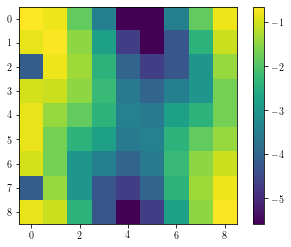

In [25]:
plt.imshow(np.log10(np.abs(auxmat)))
plt.colorbar()

/home/ak20/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


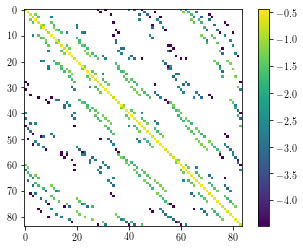

In [26]:
plt.imshow(np.log10(np.abs(MBH1.H2.todense())))
plt.colorbar()

In [27]:
auxmat[2, 7], auxmat[3, 7]

(0.00097288371141864, 0.0009728837114186331)

In [28]:
E, V = np.linalg.eigh(MBH1.H2.todense())

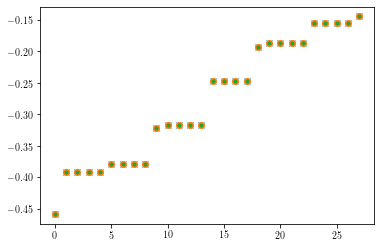

In [29]:
plt.plot(E[::3], 'x')
plt.plot(E[1::3], 'o')
plt.plot(E[2::3], '.')

In [30]:
my_arr = np.r_[-10:-0.9:1, 1:10.1:1]

In [31]:
np.sum(np.exp(-np.pi*my_arr**2/9) * 1/np.abs(my_arr) / np.sqrt(18*np.pi))

0.22459992835352333

In [32]:
auxmat[0, 0]

0.22459992835356937

In [33]:
np.real(MBH1.H2[0,0])

-0.17111156696059668

In [34]:
-auxmat[1, 0]+auxmat[1, 1]-auxmat[2, 0]+auxmat[2, 2]-auxmat[1, 0]+auxmat[1, 1]

0.17111156696059657

In [35]:
# allStates = {(1, 0): np.array([[0]], dtype=bool),
#              (1, 1): np.array([[1]], dtype=bool)}


# def getOcc(Nphi, Ne, sector=None):
#     if (Nphi, Ne) in allStates:
#         return allStates[(Nphi, Ne)]
#     if Ne == 0:
#         return np.zeros((1, Nphi), dtype=bool)
#     if Ne == Nphi:
#         return np.ones((1, Nphi), dtype=bool)
#     else:
#         upper = getOcc(Nphi-1, Ne)
#         lower = getOcc(Nphi-1, Ne-1)
        
#         allStates[(Nphi, Ne)] = np.r_[np.c_[upper, np.zeros((upper.shape[0], 1), dtype=bool)],
#                                       np.c_[lower, np.ones((lower.shape[0], 1), dtype=bool)]]
#         return allStates[(Nphi, Ne)]
    

In [36]:
# allStates = {(1, 0, 0): np.array([[0]], dtype=bool),
#              (1, 1, 0): np.array([[1]], dtype=bool)}

# def getOcc2(Nphi, Ne, sector=0):
#     assert sector >= 0 and sector < Nphi
    
#     if (Nphi, Ne, sector) in allStates:
#         return allStates[(Nphi, Ne, sector)]
#     if Ne == 0:
#         return np.zeros((1, Nphi), dtype=bool)
#     if Ne == Nphi:
#         if (Nphi%2 == 0 and sector = Nphi//2) or \
#            (Nphi%2 == 1 and sector = 0):
#             return np.ones((1, Nphi), dtype=bool)
#         else:
#             return np.zeros((0, Nphi), dtype=bool)
#     else:
#         upper = getOcc(Nphi-1, Ne, sector)
#         lower = getOcc(Nphi-1, Ne-1, (sector-Nphi+1))
        
#         allStates[(Nphi, Ne)] = np.r_[np.c_[upper, np.zeros((upper.shape[0], 1), dtype=bool)],
#                                       np.c_[lower, np.ones((lower.shape[0], 1), dtype=bool)]]
#         return allStates[(Nphi, Ne)]

In [37]:
# states_30_10 = getOcc(30, 10)

In [38]:
sector_id = np.zeros(len(states_30_10), dtype='int16')

In [39]:
import numba


In [42]:
@numba.njit
def get_sector_id(states, Nphi):
    Nh = len(states)
    NphiArr = np.arange(Nphi)
    sectorArr = np.zeros(Nh, dtype='int16')
    for i in range(Nh):
        sectorArr[i] = np.sum(NphiArr[states[i]]) % Nphi
    return sectorArr

In [117]:
%lprun -f get_sector_id get_sector_id(allStates[24, 8], 24)

Timer unit: 1e-06 s

Total time: 8.13333 s
File: <ipython-input-116-cb930b1d773f>
Function: get_sector_id at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def get_sector_id(states, Nphi):
     3         1          3.0      3.0      0.0      Nh = len(states)
     4         1         22.0     22.0      0.0      NphiArr = np.arange(Nphi)
     5         1        777.0    777.0      0.0      sectorArr = np.zeros(Nh)
     6    735472     350198.0      0.5      4.3      for i in range(Nh):
     7    735471    7782335.0     10.6     95.7          sectorArr[i] = np.sum(NphiArr[states[i]]) % Nphi
     8         1          0.0      0.0      0.0      return sectorArr

In [44]:
poop = get_sector_id(allStates[24, 8], 24)

In [110]:
poop.shape

(30045015,)

In [112]:
allStates[24, 8][3,:]

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
def findIndex(state, allStatesSector):
    # binary search
    

    

In [51]:
p64 = np.arange(20, dtype='int')
p32 = np.arange(20, dtype='int32')
p16 = np.arange(20, dtype='int16')
p8 = np.arange(20, dtype='int8')
pb = np.zeros(20, dtype='bool')

In [35]:
allStates = {}#{(1, 0): np.zeros((1, 0), dtype='int8'),
             #(1, 1): np.zeros((1, 1), dtype='int8')}


def getOcc2(Nphi, Ne):
    if (Nphi, Ne) in allStates:
        return allStates[(Nphi, Ne)]
    if Ne == 0:
        return np.zeros((1, 0), dtype='int8')
    if Ne == Nphi:
        return np.array([np.arange(Nphi, dtype='int8')])
    else:
        upper = getOcc2(Nphi-1, Ne)
        lower = getOcc2(Nphi-1, Ne-1)
        
        allStates[(Nphi, Ne)] = np.r_[upper,
                                      np.c_[lower, np.full((lower.shape[0], 1), Nphi-1, 
                                                              dtype='int8')]]
#         np.r_[np.c_[upper, np.zeros((upper.shape[0], 1), dtype=bool)],
#                                       np.c_[lower, np.ones((lower.shape[0], 1), dtype=bool)]]
        return allStates[(Nphi, Ne)]

In [ ]:
Hilb_30_10 = getOcc2(36, 12)

In [40]:
whos

Variable        Type             Data/Info
------------------------------------------
E               ndarray          84: 84 elems, type `float64`, 672 bytes
Hilb_30_10      ndarray          193536720x11: 2128903920 elems, type `int8`, 2128903920 bytes (2030.280990600586 Mb)
MBH1            MBHamiltonian    <mbhamiltonian.MBHamilton<...>object at 0x2b499b974590>
N               int64            16
NH1             float64          62852101650.0
Ne              int64            15
Nphi            function         <function <lambda> at 0x2b499b6e2ef0>
P1              Potential        <potential.Potential object at 0x2b499b9748d0>
T1              Torus            <torus.Torus object at 0x2b499b9745d0>
V               matrix           [[-2.18130398e-02+0.00000<...>041e-02+1.46565227e-18j]]
allStates       dict             n=242
auxmat          ndarray          9x9: 81 elems, type `float64`, 648 bytes
ci              int              8
conf            ndarray          84x3: 252 elems, type 

In [38]:
Hilb_30_10

array([[ 0,  1,  2, ...,  7,  8,  9],
       [ 0,  1,  2, ...,  7,  8, 10],
       [ 0,  1,  2, ...,  7,  9, 10],
       ...,
       [18, 21, 22, ..., 27, 28, 29],
       [19, 21, 22, ..., 27, 28, 29],
       [20, 21, 22, ..., 27, 28, 29]], dtype=int8)

In [ ]:
def getOcc2(self, Nphi, Ne, sector):
    """
    Find the entire Hilbert space of Ne electrons in Nphi orbitals
    each state is represented by the Ne occupied orbitals,
    e.g., [0, 2, 6, 7, 13, 15] is one of the states for Nphi = 18, Ne = 6

    inputs:
    -------
    Nphi : int, number of orbitals
    Ne   : int, number of electrons

    outputs:
    --------
    np.ndarray: type int8, with (Nphi \choose Ne) rows and Ne columns
    """

    if (Nphi, Ne) in allStates:
        return allStates[(Nphi, Ne)]
    if Ne == 0:
        return np.zeros((1, 0), dtype='int8')
    if Ne == Nphi:
        return np.array([np.arange(Nphi, dtype='int8')])
    else:
        upper = getOcc2(Nphi-1, Ne)
        lower = getOcc2(Nphi-1, Ne-1)

        allStates[(Nphi, Ne)] = np.r_[upper,
                                      np.c_[lower, np.full((lower.shape[0], 1), Nphi-1, 
                                                              dtype='int8')]]
        return allStates[(Nphi, Ne)]

In [32]:
import numba

In [33]:
@numba.njit
def writeHilbert(nuinv, NeMax, fol='/tigress/ak20/QH/hilbert/'):
    """
    Utility function to find the entire Hilbert space 
    of Ne electrons in Nphi orbitals, 
    for Nphi = 1, ..., NphiMax
    and Ne = 1, ..., NeMax
    in all momentum sectors
    each state is represented by the Ne occupied orbitals,
    e.g., [0, 2, 6, 7, 13, 15] is one of the states for cNphi = 18, Ne = 6
    it is in momentum sector 0+2+6+7+13+15 = 43

    inputs:
    -------
    nuinv     : int, inverse filling
    NeMax     : int, number of electrons
    
    outputs:
    --------
    np.ndarray: type int8, with (Nphi \choose Ne) rows and Ne columns
    """
    NphiMax = NeMax * nuinv
    
    fil = lambda Nphi, Ne, sector: 'Nphi{0:d}_Ne{1:d}_sector{2:d}'.format(Nphi, Ne, sector)
    sect_min = lambda Ne: ((Ne-1)*Ne)//2
    sect_max = lambda Nphi, Ne: ((2*Nphi-Ne-1)*Ne)//2
    
    np.save(fol+fil(1, 1, 0), np.array([[0]], dtype='int8'))
    np.save(fol+fil(1, 0, 0), np.array([[]], dtype='int8'))
    
    for Nphi in range(2, NphiMax+1): # 1, 2, ..., Nphi
        if Nphi <= NphiMax - NeMax:
            np.save(fol+fil(Nphi, 0, 0), np.array([[]], dtype='int8'))
        for Ne in range(max(1, Nphi - NphiMax + NeMax), 
                        min(Nphi+1, NeMax+1)): # 1, ..., Nphi
            for sector in range(sect_min(Ne), sect_max(Nphi, Ne)+1):
                if Nphi == NphiMax and not sector%Nphi < Nphi//nuinv:
                    continue
                try:
                    upper = np.load(fol+fil(Nphi-1, Ne, sector)+'.npy')
                except FileNotFoundError:
                    upper = np.zeros((0, Ne), dtype='int8')
                try:
                    lower = np.load(fol+fil(Nphi-1, Ne-1, sector-Nphi+1)+'.npy')
                except FileNotFoundError:
                    lower = np.zeros((0, Ne-1), dtype='int8')

                allStates = np.r_[upper,
                                  np.c_[lower, np.full((lower.shape[0], 1), Nphi-1, 
                                                        dtype='int8')]]
                np.save(fol+fil(Nphi, Ne, sector), allStates)
                
            # clean-up
            for sector in range(sect_min(Ne-1), sect_max(Nphi-1, Ne-1)+1):
                if nuinv*(Ne-1) != Nphi-1 or sector%(Nphi-1) >= (Nphi-1)//nuinv:
                    try:
                        os.remove(fol+fil(Nphi-1, Ne-1, sector)+'.npy')
                    except FileNotFoundError:
                        pass
                    
        if nuinv*Ne != Nphi-1:
            for sector in range(sect_min(Ne), sect_max(Nphi-1, Ne)+1):
                try:
                    os.remove(fol+fil(Nphi-1, Ne, sector)+'.npy')
                except FileNotFoundError:
                    pass

In [34]:
writeHilbert(5, 4)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'os': cannot determine Numba type of <class 'numba.ir.UndefinedType'>

File "<ipython-input-33-282ca2dcf009>", line 57:
def writeHilbert(nuinv, NeMax, fol='/tigress/ak20/QH/hilbert/'):
    <source elided>
                    try:
                        os.remove(fol+fil(Nphi-1, Ne-1, sector)+'.npy')
                        ^


In [9]:
fol='/tigress/ak20/QH/hilbert/'
Nphi = 30
Ne = 10
sect_min = ((Ne-1)*Ne)//2
sect_max = ((2*Nphi-Ne-1)*Ne)//2
d = {}

for sector in range(sect_min, sect_max+1):
    if sector%Nphi == 0:
        try:
            fil = lambda Nphi, Ne, sector: 'Nphi{0:d}_Ne{1:d}_sector{2:d}'.format(Nphi, Ne, sector)
            f = np.load(fol+fil(Nphi, Ne, sector)+'.npy')
            d[sector] = f
        except FileNotFoundError:
            pass

In [10]:
d.keys()

dict_keys([60, 90, 120, 150, 180, 210, 240])

In [11]:
poop = 0
for k in d.keys():
    print(k, len(d[k]))
    poop += len(d[k])

60 164
90 27822
120 292714
150 506357
180 166750
210 7588
240 7


In [12]:
poop

1001402

In [13]:
state222 = np.array([ 2,  3, 10, 12, 13, 16, 19, 23, 24, 28], dtype='int8')

In [14]:
state222

array([ 2,  3, 10, 12, 13, 16, 19, 23, 24, 28], dtype=int8)

In [17]:
@numba.njit
def indexOf(state, allStatesSector, useNumba=False):
    N = len(allStatesSector)
    
    assert np.sum(state) == np.sum(allStatesSector[0])
    
    l = 0
    r = N
    GreaterFn = isGreaterNumba #if useNumba else isGreater
    #binary search
    while r-l > 1:
        mid = (l+r)//2
        if GreaterFn(allStatesSector[mid], state):
            r = mid
        else:
            l = mid
        
    return l

@numba.njit
def isGreaterNumba(s1, s2):
    """
    return True if s1 comes 'lexicographically'
    after s2
    """
    assert len(s1) == len(s2)
    N = len(s1)
    arr = range(len(s1))
    for c in arr:
        if s1[N-c-1] > s2[N-c-1]:
            return True
        elif s1[N-c-1] < s2[N-c-1]:
            return False
    return False

def isGreater(s1, s2):
    """
    return True if s1 comes 'lexicographically'
    after s2
    """
    assert len(s1) == len(s2)
    N = len(s1)
    arr = range(len(s1))
    for c in arr:
        if s1[N-c-1] > s2[N-c-1]:
            return True
        elif s1[N-c-1] < s2[N-c-1]:
            return False
    return False

In [27]:
state222+3

array([ 5,  6, 13, 15, 16, 19, 22, 26, 27, 31], dtype=int8)

In [18]:
import time

In [22]:
randints = np.random.randint(low=0, high=len(d[150]), size=1000)
t1 = time.time()
for ind in randints:
    _ = indexOf(d[150][ind], d[150], True)
t2 = time.time()
for ind in randints:
    _ = indexOf(d[150][ind], d[150], False)
t3 = time.time()

In [23]:
print(t2-t1, t3-t2)

0.002004861831665039 0.001728057861328125


In [370]:
indexOf(d[150][7], d[150], False)

7

In [25]:
import hilbert

In [5]:
H1 = hilbert.Hilbert()

In [24]:
H1.indexOf(d[150][79], d[150])

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'self': cannot determine Numba type of <class 'numba.ir.UndefinedType'>

File "hilbert.py", line 96:
    def indexOf(state, allStatesSector):
        <source elided>
            mid = (l+r)//2
            if self.isGreater(allStatesSector[mid], state):
            ^


In [28]:
poop = {'a': 33, 'b': 14}

In [29]:
poop

{'a': 33, 'b': 14}

In [30]:
list(poop)

['a', 'b']

In [34]:
list(poop.values())

[33, 14]

In [169]:
@numba.njit
def poop(a, b):
    if a == 0:
        def fn(x):
            return x*b
        return fn
    else:
        def fn(x):
            return x+b
        return fn
    

In [170]:
f = poop(1, 4)

TypingError: Failed in nopython mode pipeline (step: convert make_function into JIT functions)
Cannot capture the non-constant value associated with variable 'b' in a function that will escape.

File "<ipython-input-169-9308d9f755b4>", line 4:
    if a == 0:
        def fn(x):
        ^


In [168]:
f(17)

21

In [151]:
arrs = [np.random.randn(4), np.random.randn(8)]

In [156]:
poop(np.random.randn(4), 8)

4

In [31]:
def getMatVec(Nphi, Ne, T2, hilb):
    # hilbs must be a list of arrays, corresponding to all the sub-sectors in the
    # Hilbert space
    NH = len(hilb) # size of Hilbert space
    
    def fn(v):
        vOut = np.zeros(NH)
        
        for cHilb in range(NH):
            eOcc = hilb[cHilb] # occupied electrons
            
            #find pairs
            for p1 in range(Ne):
                for p2 in range(p1+1, Ne):
                    c1 = eOcc[p1] # orbital of first occupied electron
                    c2 = eOcc[p2] # orbital of second occupied electron
                    
                    # find new pairs
                    for cx in range(1, Nphi):
                        c1new = (c1+cx)%Nphi
                        c2new = (c2-cx)%Nphi
                        if c1new >= c2new:
                            continue
                        if c1new in eOcc or c2new in eOcc:
                            continue
                        else:
                            # at this point, we are sure that c2new > c1new,
                            # and that they are both not in eOcc
                            
                            # populate eOccNew
                            eOccNew = np.zeros(Ne, dtype='int8') # array of length Ne
                            cNeOld = 0
                            state = 0
                            for cNe in range(Ne):
                                if cNeOld == p1 or cNeOld == p2:
                                    cNeOld += 1
                                
                                if state == 0:
                                    if eOcc[cNeOld] < c1new:
                                        eOccNew[cNe] = eOcc[cNeOld]
                                        cNeOld += 1
                                    else:
                                        eOccNew[cNe] = c1new
                                        p1new = cNe
                                        state = 1
                                
                                elif state == 1:
                                    if eOcc[cNeOld] < c2new:
                                        eOccNew[cNe] = eOcc[cNeOld]
                                        cNeOld += 1
                                    else:
                                        eOccNew[cNe] = c2new
                                        p2new = cNe
                                        state = 2
                                
                                else:
                                    eOccNew[cNe] = eOcc[cNeOld]
                                    cNeOld += 1
                                
                            
                            # find index of eOccNew in hilb, again binary search
                            indNew = indexOf(eOccNew, hilb)
                            
                            
                            matrixel = 0
                            # add the four terms, with correct signs
                            
                            # update vOut
                            vOut[indNew] += matrixel
                            
            return vOut
    return fn

In [25]:
def doSmt(p1, p2, eOcc, c1new, c2new, Ne):
    c1 = eOcc[p1]
    c2 = eOcc[p2]

    eOccNew = np.zeros(Ne, dtype='int8') # array of length Ne
    cNeOld = 0
    state = 0
    for cNe in range(Ne):
        if cNeOld == p1 or cNeOld == p2:
            cNeOld += 1

        if state == 0:
            if eOcc[cNeOld] < c1new:
                eOccNew[cNe] = eOcc[cNeOld]
                cNeOld += 1
            else:
                eOccNew[cNe] = c1new
                p1new = cNe
                state = 1

        elif state == 1:
            if eOcc[cNeOld] < c2new:
                eOccNew[cNe] = eOcc[cNeOld]
                cNeOld += 1
            else:
                eOccNew[cNe] = c2new
                p2new = cNe
                state = 2

        else:
            eOccNew[cNe] = eOcc[cNeOld]
            cNeOld += 1
    
    return (p1new, p2new, eOccNew) 

In [30]:
eOcc = np.array([0, 4, 5, 7, 10, 11, 12,
                 21, 24, 29, 36, 37, 38], dtype='int8')
p1 = 2; p2 = 4
doSmt(p1, p2, eOcc, 2, 13, 13)

(1, 6, array([ 0,  2,  4,  7, 11, 12, 13, 21, 24, 29, 36, 37, 38], dtype=int8))

## NUMBA EXPERIMENTS

In [59]:
@numba.jit(numba.int8[:](numba.int8[:], numba.int8[:]))
def f(x, y):
    # A somewhat trivial example
    return x + y

In [48]:
f(4,4)

TypeError: No matching definition for argument type(s) int64, int64

In [60]:
f(np.arange(4, dtype='int8'), np.zeros(4, dtype='int8'))

array([0, 1, 2, 3], dtype=int8)

In [15]:
x_arr = np.r_[0:3*np.pi:1000j]+1e-3

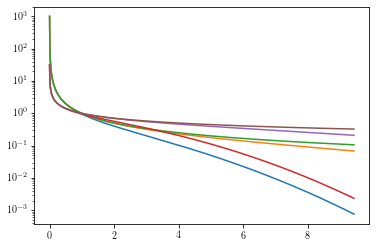

In [21]:
f, ax = plt.subplots()
# ax.plot(x_arr, scipy.special.jv(0, x_arr))
ax.plot(x_arr, V(x_arr, n=1, x=3))
ax.plot(x_arr, V(x_arr, n=1, x=10))
ax.plot(x_arr, V(x_arr, n=1, x=np.inf))

ax.plot(x_arr, V(x_arr, n=0.5, x=3))
ax.plot(x_arr, V(x_arr, n=0.5, x=10))
ax.plot(x_arr, V(x_arr, n=0.5, x=np.inf))

ax.set_yscale('log')
def V(r, n=1, x=10):
    return 1/r**n * np.exp(-0.5 * (r/x)**2)

In [26]:
def VpowerLaw(r, n=1, x=10):
    return 1/r**n * np.exp(-0.5 * (r/x)**2)

def hmm(r, k, **kwargs):
    return r * scipy.special.jv(0, k*r) * VpowerLaw(r, **kwargs)

k_arr = np.r_[0:17] / 16

intOut = np.zeros((len(k_arr), 2))
for k in k_arr:
    [scipy.integrate.quad(hmm, 0, 1, args=(k)),
     scipy.integrate.quad(hmm, 1, np.inf, args=(k))]

((0.9183048931407003, 1.0195232359907495e-14),
 (0.08681260740522834, 1.1868743592156762e-08))

In [123]:
# @numba.njit(numba.float64[:](numba.float64[:], numba.float64, numba.float64))
def VFourier(k, n=1, x=np.inf):
    """
    obtain V(k)
    
    inputs:
    -------
    k     : float, absolute value of momentum
    n     : float, power law fall-off
    x     : float, Gaussian envelope length scale
    
    outputs:
    --------
    float : V(k) at continuum k 
    """
    
    # if only Gaussian
    if n == 0:
        return 2 * np.pi * x**2 * np.exp(-x**2 * k**2)
    else:
        # if Coulomb
        if n == 1 and x is np.inf:
            return 2*np.pi/k
        else:
#             @numba.njit(numba.float64(numba.float64, numba.float64, numba.float64, numba.float64))
            def integrand(r, k1, n1, x1):
                return r * scipy.special.jv(0, k1*r) * 1/r**n1 * np.exp(-0.5 * (r/x1)**2)
            
            ret = np.zeros_like(k_arr)
            N  = len(ret)
            
            for i in range(N):
                val1, _ = scipy.integrate.quad(integrand, 0, 1, args=(k_arr[i], n, x), limit=1000)
                val2, _ = scipy.integrate.quad(integrand, 1, np.inf, args=(k_arr[i],n, x), limit=1000)
                ret[i] = 2 * np.pi * (val1 + val2)
            
            return ret

In [124]:
# @numba.njit(numba.float64(numba.float64, numba.float64, numba.float64, numba.float64))
def integrand(r, k1, n1, x1):
    return r * scipy.special.jv(0, k1*r) * 1/r**n1 * np.exp(-0.5 * (r/x1)**2)

In [125]:
k_arr = np.r_[0.1:20.001:0.1]
VFourier(k_arr, n=1, x=10)

/home/ak20/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: underflow encountered in exp


array([62.29105882, 36.67766074, 22.63470462, 16.30099759, 12.84558277,
       10.62779935,  9.07218816,  7.91765394,  7.0256754 ,  6.31533951,
        5.73604473,  5.25446093,  4.84771418,  4.49957277,  4.19819348,
        3.93472926,  3.70243632,  3.49608322,  3.31154877,  3.14554197,
        2.99540276,  2.85895756,  2.73441283,  2.62027538,  2.51529203,
        2.41840315,  2.32870672,  2.24543   ,  2.16790721,  2.09556158,
        2.02789099,  1.96445626,  1.90487155,  1.84879655,  1.79592989,
        1.74600378,  1.69877943,  1.65404324,  1.61160355,  1.57128789,
        1.53294066,  1.49642108,  1.4616015 ,  1.42836589,  1.39660854,
        1.36623295,  1.33715084,  1.30928129,  1.28255   ,  1.25688862,
        1.23223416,  1.20852848,  1.18571785,  1.1637525 ,  1.1425863 ,
        1.12217639,  1.10248297,  1.08346893,  1.06509973,  1.04734309,
        1.03016887,  1.01354888,  0.99745671,  0.98186761,  0.96675835,
        0.9521071 ,  0.93789336,  0.9240978 ,  0.91070224,  0.89

/home/ak20/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: underflow encountered in exp


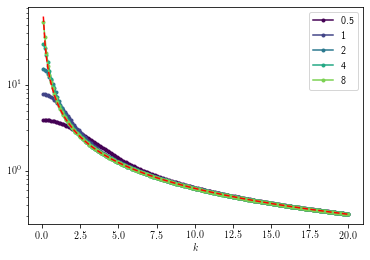

In [127]:
# Lx = 75
np.seterr(all='warn')
k_arr = np.r_[0.1:20.001:0.1]
f, ax = plt.subplots()
n = 2
x_arr = [0.5, 1, 2, 4, 8]
for cx, x in enumerate(x_arr):
    ax.plot(k_arr, VFourier(k_arr, n=1, x=x), color=plt.cm.viridis((1.*cx/len(x_arr))),
            label=str(x), marker='.')
ax.plot(k_arr, 2*np.pi / k_arr, '--r')
ax.set_xlabel(r'$k$')
ax.set_yscale('log')
ax.legend(loc='best')

In [105]:
n = 1
x = 8

def integrand(r, k1):
    return r * scipy.special.jv(0, k1*r) * 1/r**n * np.exp(-0.5 * (r/x)**2)

k_arr = np.r_[0.1:20.001:0.1]
i = -1

for l in [50, 100, 500, 1000]:
    val1, _ = scipy.integrate.quad(integrand, 0, 1, args=(k_arr[i]), limit=l)
    val2, _ = scipy.integrate.quad(integrand, 1, np.inf, args=(k_arr[i]), limit=l)

    print(val1, val2)

0.05289074306406815 -0.0033422829376428104
0.05289074306406815 -0.002889778170273339
0.05289074306406815 -0.002889765997400153
0.05289074306406815 -0.002889765997400153


/home/ak20/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: underflow encountered in exp
  """
/home/ak20/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  if sys.path[0] == '':
/home/ak20/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local 

In [93]:
np.exp(-1000)

/home/ak20/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: underflow encountered in exp
  """Entry point for launching an IPython kernel.


0.0

In [103]:
val1, val2

(0.05289074306406815, -0.002889765997400153)

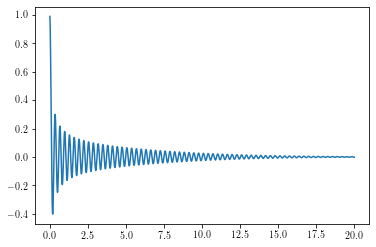

In [100]:
f, ax = plt.subplots()
r_arr = np.r_[0.01:20.01:0.01]
ax.plot(r_arr, integrand(r_arr, k_arr[-1]))

In [37]:
scipy.integrate.quad(moo, 0, 1, args={'b': 7})

TypeError: unsupported operand type(s) for *: 'dict' and 'float'

In [34]:
d1 = {'a': 10, 'b': 20}

In [35]:
tuple(d1)

('a', 'b')

In [78]:
np.outer(np.arange(5), np.random.rand(5))

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.30492008, 0.02312441, 0.46377796, 0.7021982 , 0.59805544],
       [0.60984016, 0.04624883, 0.92755592, 1.4043964 , 1.19611088],
       [0.91476024, 0.06937324, 1.39133389, 2.10659459, 1.79416632],
       [1.21968031, 0.09249765, 1.85511185, 2.80879279, 2.39222176]])

In [143]:
kx = np.arange(5)
ky = np.random.rand(6)

In [144]:
p = kx[:, np.newaxis]**2 + ky**2

In [135]:
def VFourier(k, n=1, x=np.inf, l=1000, **kwargs):
    print(k, n, x, l)

In [136]:
d1 = {'q': 40}#'n': 3,
#       'x': 2,}
#       'l': 50}
VFourier(0.5, **d1)

0.5 1 inf 1000


In [137]:
1000 / (4*60 + 35) * 3.6

13.09090909090909

In [138]:
1000 / (5*60 + 45) * 3.6

10.434782608695652

In [145]:
for k in p:
    print(k)

[0.00595632 0.00454255 0.3694124  0.65433512 0.0045845  0.3516463 ]
[1.00595632 1.00454255 1.3694124  1.65433512 1.0045845  1.3516463 ]
[4.00595632 4.00454255 4.3694124  4.65433512 4.0045845  4.3516463 ]
[9.00595632 9.00454255 9.3694124  9.65433512 9.0045845  9.3516463 ]
[16.00595632 16.00454255 16.3694124  16.65433512 16.0045845  16.3516463 ]


In [1]:
p.shape

NameError: name 'p' is not defined

In [12]:
from scipy.sparse.linalg import LinearOperator

@numba.njit(numba.float64[:](numba.float64[:]))
def mv(v):
    x = np.array([ 1, 19, 29, 43, 18,  6, 27, 32, 11, 25,
                   -2, -38, -58, -86, -36, -12, -54, -64, -22, -50])
    w = np.zeros(10)
    
    for i in range(20):
        w[i%10] = x[i] * v[(9-i)%10]
        
    return w


In [9]:
x = np.array([ 1, 19, 29, 43, 18,  6, 27, 32, 11, 25])

In [11]:
-x*2

array([ -2, -38, -58, -86, -36, -12, -54, -64, -22, -50])

In [13]:
A = LinearOperator((10, 10), matvec=mv)

In [14]:
scipy.sparse.linalg.eigsh(A, k=6, M=None, sigma=None, which='LA')

(array([-32.43484671,  33.20803628,  36.11951866,  42.33443018,
         67.31966108,  73.01157758]),
 array([[-7.74525682e-01, -4.91293011e-01,  1.56478476e-01,
         -2.85089818e-02, -4.48640353e-03,  2.01975832e-02],
        [ 4.03690910e-02,  7.37783323e-03,  1.92400078e-01,
         -6.92532162e-01, -3.50344390e-03, -1.33021240e-02],
        [ 1.43580655e-02,  4.10779523e-03, -1.23413973e-02,
         -2.07384662e-02, -7.08302699e-01, -8.91166187e-02],
        [-6.74735629e-03,  1.58185565e-02, -2.45831632e-02,
         -2.81425307e-02, -9.39220672e-02,  7.76027529e-01],
        [-3.45586061e-01,  3.81940979e-01,  6.71100467e-01,
          1.95106113e-01, -6.32635511e-04,  1.64851105e-02],
        [-3.10340862e-01, -2.24103216e-01, -5.43856733e-01,
         -1.12713507e-01,  1.26738999e-02, -1.41768516e-02],
        [-1.25787317e-02, -2.39528334e-02,  2.15513101e-02,
          7.60236853e-03,  7.87475692e-02, -6.16627506e-01],
        [ 1.03686274e-02,  1.75794046e-02, -1.58669

In [128]:
spec = [
    ('x', numba.float64[:]), 
    ('N', numba.int64)# an array field
]

@numba.jitclass(spec)
class myClassJit:
    
    def __init__(self):
        np.random.seed(455)
        self.N = 100_000
        self.x = np.random.rand(self.N)
        
    def mv(self, v):
        w = np.zeros(self.N)
        for i in range(self.N):
            w[i] += self.x[i] * v[(i+2)%self.N]
            w[(i+2)%self.N] += self.x[i] * v[i]

        return w
    
class myClass:
    
    def __init__(self):
        np.random.seed(455)
        self.N = 100_000
        self.x = np.random.rand(self.N)
        
    def mv(self, v):
        w = np.zeros(self.N)
        for i in range(self.N):
            w[i] += self.x[i] * v[(i+2)%self.N]
            w[(i+2)%self.N] += self.x[i] * v[i]

        return w

In [129]:
myObjJit = myClassJit()
myObj = myClass()
AJit = LinearOperator((100_000, 100_000), matvec=myObjJit.mv)
A = LinearOperator((100_000, 100_000), matvec=myObj.mv)

In [132]:
t1 =  time.time()
VJit = AJit.matvec(np.ones(100_000))
t2 = time.time()
V = A.matvec(np.ones(100_000))
t3 = time.time()
print(t3-t2, t2-t1)

0.1595759391784668 0.0019483566284179688


In [125]:
import time

In [66]:
def mv(v):
    w = np.zeros(10)

    for i in range(20):
        w[i%10] = x[i] * v[(9-i)%10]

    return w

In [ ]:
scipy.sparse.linalg.eigsh(A, k=6, M=None, sigma=None, which='SA')

In [80]:
M = np.zeros((10, 10))
x = np.array([ 1, 19, 29, 43, 18,  6, 27, 32, 11, 25])

for i in range(10):
    M[i, (i+2)%10] = x[i]
    M[(i+2)%10, i] = x[i]

In [81]:
M

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., 11.,  0.],
       [ 0.,  0.,  0., 19.,  0.,  0.,  0.,  0.,  0., 25.],
       [ 1.,  0.,  0.,  0., 29.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 19.,  0.,  0.,  0., 43.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 29.,  0.,  0.,  0., 18.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 43.,  0.,  0.,  0.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 18.,  0.,  0.,  0., 27.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0., 32.],
       [11.,  0.,  0.,  0.,  0.,  0., 27.,  0.,  0.,  0.],
       [ 0., 25.,  0.,  0.,  0.,  0.,  0., 32.,  0.,  0.]])

In [82]:
np.linalg.eigh(M)

(array([-48.66970975, -39.65191996, -38.87121517, -22.60022918,
          0.41081299,   2.28407144,  21.98955592,  34.5767149 ,
         39.07107543,  51.46084337]),
 array([[-2.12920044e-17, -1.03177410e-16,  1.06430077e-01,
          3.01227207e-01,  9.01442363e-01,  2.41678935e-16,
          2.62498469e-01, -4.18169626e-17,  1.28183573e-01,
         -1.43896242e-18],
        [ 4.00270027e-01, -2.85397474e-01, -1.66533454e-16,
          0.00000000e+00,  2.01227923e-16, -7.43978813e-01,
          0.00000000e+00,  2.14585551e-01,  5.55111512e-17,
         -3.98473028e-01],
        [-1.24900090e-16, -4.82253126e-16,  4.25278016e-01,
         -5.39390452e-01,  2.27433567e-01,  8.32667268e-17,
         -5.42748586e-01,  9.36750677e-17,  4.26490908e-01,
          4.16333634e-16],
        [-6.54780895e-01, -2.45966238e-01, -6.66133815e-16,
          5.55111512e-17,  3.64291930e-17, -6.36247631e-02,
         -1.11022302e-16, -4.08662072e-01, -1.11022302e-16,
         -5.82846283e-01],
      

In [5]:
poop = np.load('/tigress/ak20/QH/hilbert/Nphi21_Ne7_sector63.npy')

In [6]:
poop

array([[ 6,  7,  8, ..., 10, 11, 12],
       [ 5,  7,  8, ..., 10, 11, 13],
       [ 5,  6,  8, ..., 10, 12, 13],
       ...,
       [ 0,  1,  2, ..., 16, 19, 20],
       [ 0,  1,  2, ..., 17, 19, 20],
       [ 0,  1,  2, ..., 18, 19, 20]], dtype=int8)

In [7]:
jetty = np.zeros((0, 7), dtype='int8')

In [16]:
# @numba.njit
def fn1(Nphi, Ne, sector, fol='/tigress/ak20/QH/hilbert/'):
    fil = np.load(fol+'Nphi{0:d}_Ne{1:d}_sector{2:d}.npy'.format(Nphi, Ne, sector))
    return fil

In [17]:
fn1(21, 7, 63)

array([[ 6,  7,  8, ..., 10, 11, 12],
       [ 5,  7,  8, ..., 10, 11, 13],
       [ 5,  6,  8, ..., 10, 12, 13],
       ...,
       [ 0,  1,  2, ..., 16, 19, 20],
       [ 0,  1,  2, ..., 17, 19, 20],
       [ 0,  1,  2, ..., 18, 19, 20]], dtype=int8)

In [33]:
@numba.njit(numba.float64[:](numba.int64))
def f1(N):
    y = np.zeros(N)
    return y

In [27]:
f1(6)

array([0., 0., 0., 0., 0., 0.])

In [35]:
poo = numba.float32[:]

In [44]:
@numba.njit(numba.boolean(numba.int64, numba.int64))
def getTrue(x, y):
    if x > y:
        return True
    else:
        return False

In [46]:
getTrue(43., 11.3)

True

AttributeError: module 'numba' has no attribute 'version'

In [47]:
import hilbert

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Invalid use of Function(<built-in function zeros>) with argument(s) of type(s): (int64, dtype=Literal[str](int16))
 * parameterized
In definition 0:
    All templates rejected with literals.
In definition 1:
    All templates rejected without literals.
This error is usually caused by passing an argument of a type that is unsupported by the named function.
[1] During: resolving callee type: Function(<built-in function zeros>)
[2] During: typing of call at /home/ak20/QH/QH_ED/hilbert.py (153)


File "hilbert.py", line 153:
    def get_sector_id(states, Nphi):
        <source elided>
        NphiArr = np.arange(Nphi)
        sectorArr = np.zeros(Nh, dtype='int16')
        ^
